# Primer ejemplo: Datos en forma de círculos

## Instalación de Kepler-Mapper

"Kepler-Mapper" es una librería para el algoritmo MAPPER (https://kepler-mapper.scikit-tda.org/).

Instalando con pip:

"pip install kmapper"

Instalando desde la fuente:

"git clone https://github.com/MLWave/kepler-mapper
cd kepler-mapper
pip install -e ."

## Importamos la clase kmapper

In [2]:
import kmapper as km

## Importamos datos muestra

"Scikit-learn" ('sklearn' pa'los cuates), es una librería para el lenguaje de programación Python que incluye algoritmos de clasificación, regresión y conglomerados. Se pueden encontrar ejemplos en: https://scikit-learn.org/

In [3]:
from sklearn import datasets

El paquete 'sklearn.datasets' contiene distintos conjuntos de datos, entre precargados hasta generados de manera aleatoria.

In [4]:
data, labels = datasets.make_circles(n_samples=5000, noise=0.01, factor=0.4)

El (sub)paquete 'sklearn.datasets.make_circles' genera dos círculos (uno dentro de otro) en 2D.

### Parámetros:
* n_samples: El número total (int) de puntos generados.
* shuffle: (Booleano), por default "True".
* noise: (float) Desviación estándar de 'ruido' Gaussiano  agregado a los datos.
* random_state: (int) Determina la generación de números aleatorios para el ruido y la mezcla aleatoria de conjuntos de datos.
* factor: (float) Factor de escalamiento entre el círculo interior y el exterior, en el rango (0,1)

### Salida:
* X: Las muestras generadas.
* y: Etiquetas (0 o 1) para la pertenecia a la clase de cada muestra

## Echémosle un ojo

Veamos el tipo de datos generados:

In [16]:
data

array([[-8.22386704e-01, -5.94200534e-01],
       [-3.22290072e-01,  9.45532343e-01],
       [ 8.28139815e-01, -5.53406326e-01],
       ...,
       [-7.66387383e-01,  6.45370693e-01],
       [-4.04569588e-01, -2.32407105e-04],
       [ 3.35435351e-01, -2.09879271e-01]])

Para visualizar, cargamos la librería necesaria:

In [5]:
import matplotlib.pyplot as plt

"Matplotlib" es una librería para visualización en Python (https://matplotlib.org/stable/index.html), 'matplotlib.pyplot' es un paquete para generar y visualizar figuras. 

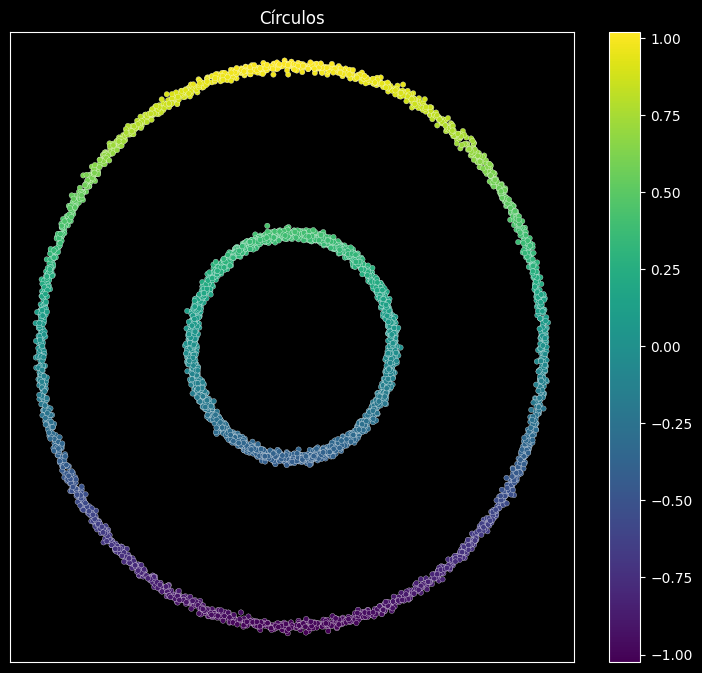

In [12]:
plt.figure(figsize=(20, 18))
ax = plt.subplot(221)
sc = ax.scatter(data[:, 0], data[:, 1], c=data[:, 1], cmap='viridis', s=15, edgecolor="w",  linewidths=0.2)
ax.set_title("Círculos")
ax.set_xticks(())
ax.set_yticks(())

# Add a colorbar
plt.colorbar(sc)

## Iniciamos MAPPER

In [19]:
mapper = km.KeplerMapper(verbose=0)

Con la paquetería 'KeplerMapper' podemos generar redes topológicas de un conjunto de datos.

In [20]:
projected_data = mapper.fit_transform(data)

La función 'fit_transform' ajusta y transforma los datos usando una función filtro.

### Parámetros
* X: Los datos a ajustar y transformar
* projection: La función filtro.
* scaler: La función escaladora aplicada a los datos después del filtro (por default: preprocessing.MinMaxScarler())
* distance_matrix: Matriz de distancias con la métrica elegida, antes del filtro.

## Creamos la cubierta

In [21]:
cover = km.Cover(n_cubes=15, perc_overlap=0.3)

La función 'kmapper.Cover' define la cubierta del espacio de parámetros.

### Parámetros
* n_cubes: Número (int) de hipercubos en cada dimensión (resolución).
* perc_overlap: Porcentaje (float) de traslape entre cubos adyacentes.
* limits: (cota inferior, cota superior) de cada dimensión.

## Aplicando el algoritmo MAPPER:

In [22]:
graph = mapper.map(projected_data, data, cover=cover)

La función 'kmapper.map' aplica el algoritmo MAPPER y construye el complejo simplicial.

### Parámetros:
* lens: Representación de menor dimensión de los datos (generalmente la salida de fit_transform.
* X: Datos originales o sus conglomerados.
* clusterer: Un algoritmo de Scikit-learn compatible (por default: DBSCAN).
* cover: Esquema de cubiertas inducidas por el filtro.
* nerve: Nervio.
* precomputed: Le dice a MAPPER si los datos que se están conglomerando es una matriz de distancias precalculadas.
* remove_duplicated nodes: Remueve los nodos duplicados antes de que las aristas sean determinados.
* nr_cubes: El número de intervalos/hipercubos a crear (ahora dentro de 'Cover').
* overlap_perc: El porcentaje de traslape entre intervalos/hipercubos consecutivos (ahora en Cover).

### Salida:
* simplicial_complex: Diccionario con nodos, enlaces y meta-información.

## Visualizando el complejo simplicial

In [23]:
mapper.visualize(graph, path_html="Circulos aleatorios Sum.html",
                 title="make_circles(n_samples=5000, noise=0.01, factor=0.4)")

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>make_circles(n_samples=5000, noise=0.01, factor=0.4) | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\

La función 'kmapper.visualize' genera una visualización del complejo simplicial salida dado por el algoritmo MAPPER.

### Parámetros:
* graph: Complejo simplicial salida de la función 'map'.
* color_function: Ahora 'color_values'
* color_values: Conjuntos de valores para cada conjunto, debe ser un solo color para cada dato.
* color_function_name: Descripción de las funciones usadas para generar 'color_values'. Serán usadas como etiquetas en la visualización.
* node_color_function: Aplicado a 'color_values' de los datos en un nodo, para determinar el color de los nodos.
* colorscale: Especifica la escala de colores usada.
* path_html: Nombre del archivo .html salida.
* custon_meta: Render en el panel de resumen de MAPPER
* custom_tooltip: Valor a mostrar para cada entrada en el nodo.
* save_file: Guarda el archivo en 'path_html'.
* X: Calcula  información estadística  sobre  los datos originales respecto a cada nodo.
* X_names: Nombres de cada variable en X para ser mostrados.
* lens: Calcula estadísticas de cada nodo basadas en el filtro.
* lens_name: Nombres de cada variable en 'lens' para ser mostradas.
* nbins: Número de contenedores (bins) mostrados en el histograma.
* include_searchbar: Si se incluye una barra de búsqueda arriba de la visualización.
* include_min_intersection_selector: Si se incluye una entrada para cambiar de manera dinámica 'min_intersection' para que una arista sea dibujada.

### Salida
* html: Regresa el mismo html que es normalmente generado en path_html. Completa la gráfica y los datos para ser visualizados